In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV, RFE
from sklearn import metrics


In [2]:
df = pd.read_csv('winequality-red.csv',sep=";") #gosto mais de vinho tinto

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

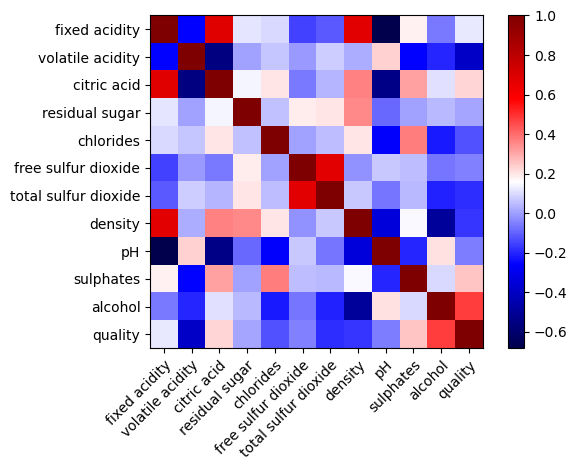

In [5]:
plt.imshow(df.corr(),cmap='seismic')
plt.colorbar()
plt.gca().set_xticks(np.arange(len(df.columns)))
plt.gca().set_yticks(np.arange(len(df.columns)))
plt.gca().set_xticklabels(labels=df.columns)
plt.gca().set_yticklabels(labels=df.columns)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.tight_layout()
plt.show()


In [11]:
X = df.drop(columns=['quality'])
y=df['quality']

In [12]:
X_train, X_test,y_train,y_test=train_test_split(X,y)

In [22]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
model=LinearRegression()
model.fit(X_train,y_train)
y_prediction=model.predict(X_test)
print(f'R: {model.score(X_test,y_test)}')
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

R: 0.36752279593999637
MAE: 0.4741349913520634
MSE: 0.38264475547377685
RMSE: 0.6185828606369375


In [82]:
model=Lasso(alpha=0.01)
model.fit(X_train,y_train)
y_prediction=model.predict(X_test)
print(f'R: {model.score(X_test,y_test)}')
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

R: 0.35604563924215393
MAE: 0.48623496353499
MSE: 0.38958836354374216
RMSE: 0.6241701399007663


In [83]:
model=Ridge(alpha=0.1)
model.fit(X_train,y_train)
y_prediction=model.predict(X_test)
print(f'R: {model.score(X_test,y_test)}')
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

R: 0.37135305823900455
MAE: 0.4725764018436672
MSE: 0.3803274707220162
RMSE: 0.6167069569268829


In [86]:
regressor = LinearRegression()
model = RFECV(regressor, step=1, cv=10)             
model = model.fit(X_train, y_train)
y_prediction=model.predict(X_test)
print(f'R: {model.score(X_test,y_test)}')
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))


R: 0.36752279593999637
MAE: 0.4741349913520634
MSE: 0.38264475547377685
RMSE: 0.6185828606369375


In [88]:
regressor = LinearRegression()
model = RFE(regressor, n_features_to_select=5, step=1)             
model = model.fit(X_train, y_train)
y_prediction=model.predict(X_test)
print(f'R: {model.score(X_test,y_test)}')
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))


R: 0.22466512208213918
MAE: 0.5445374611223613
MSE: 0.46907275529731884
RMSE: 0.6848888634642257


In [89]:
regressor = LinearRegression()
model = RFE(regressor, n_features_to_select=6, step=1)             
model = model.fit(X_train, y_train)
y_prediction=model.predict(X_test)
print(f'R: {model.score(X_test,y_test)}')
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))


R: 0.3578963443521733
MAE: 0.48331498303646875
MSE: 0.38846869851908733
RMSE: 0.6232725716081908


In [90]:
regressor = LinearRegression()
model = RFE(regressor, n_features_to_select=7, step=1)             
model = model.fit(X_train, y_train)
y_prediction=model.predict(X_test)
print(f'R: {model.score(X_test,y_test)}')
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))


R: 0.36152578275823455
MAE: 0.4826846570063026
MSE: 0.38627291096741034
RMSE: 0.621508576744851
